In [4]:
import pandas              as pd 
import numpy               as np 
import matplotlib.pyplot   as plt 
import seaborn             as sns; sns.set() 
import branca
import geopandas
import folium 
from wordcloud import WordCloud 
from scipy.stats import ttest_ind 
from IPython.display import display
from folium.plugins import TimeSliderChoropleth

# Introduccion (5 min)
Contexto de Negocio. ¡Felicidades! Recientemente fue ascendido a Jefe de Estrategia regional del Departamento de Policía de Chicago. Tiene muchos años de experiencia con el trabajo de campo, pero esta es la primera vez que tiene que pensar en el panorama general. Chicago es una ciudad grande y sus recursos son limitados. Por lo tanto, debe diseñar un plan integral para mejorar la eficiencia del despliegue de la fuerza policial para combatir el crimen. Tomar decisiones basadas en datos es esencial, incluso en la aplicación de la ley, donde el conocimiento previo generalmente domina el proceso de toma de decisiones.

Problema de Negocio. Su tarea principal es explorar los datos e identificar patrones de delincuencia en Chicago, y desarrollar estrategias para desplegar de manera eficiente su fuerza laboral para luchar contra la delincuencia

Contexto analitico. Entonces, encontró un conjunto de datos disponible para el Departamento de Policía de Chicago de 2017 con información sobre delitos cometidos en toda la ciudad. En este caso, nos centraremos en el análisis exploratorio para construir algunas estrategias preliminares para el despliegue policial. Estas estrategias pueden consolidarse o descartarse aún más mediante un análisis estadístico más riguroso. Uno de los aspectos clave de este caso es que nuestros datos contienen registros de incidentes delictivos en los que a menudo no tenemos una definición clara del resultado (como la "gravedad" de un delito). Analizaremos las formas de tratar estos datos y cómo se pueden incorporar para obtener conclusiones significativas.

El caso está estructurado de la siguiente manera. (1) analizaremos resúmenes univariados (2) elaboraremos una estrategia preliminar basada en esto (3) analizaremos las distribuciones conjuntas y revisaremos nuestra estrategia, y finalmente (4) pensaremos en cambiar las estrategias en función de nuestras prioridades y la gravedad de la situación. crímenes.

Explorando patrones asociados con variables individuales de interes (5 min)
Leamos y veamos nuestro conjunto de datos. Este conjunto de datos se descarga de este website. Contiene incidentes delictivos denunciados (con la excepción de asesinatos, donde existen datos para cada víctima) que ocurrieron en la ciudad de Chicago en 2017.

Comenzamos el caso con una exploración básica de la distribución de los distintos parámetros. Dado que este conjunto de datos está más enfocado en datos categóricos, comenzaremos investigando las diversas frecuencias de cada categoría dentro de cada parámetro:

In [5]:
Url = "https://raw.githubusercontent.com/dfbustosus/Bootcamp-DS-2024-I/main/Clase%2015%20-%2025%20Abril%202024/Chicago_crime_data.csv"

df = pd.read_csv(Url, dtype={'ID': object, 'beat_num': object})
df



,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,43.0,7,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,42.0,8,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267173,11035993,JA367627,1/1/17 0:00,026XX W COYLE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,50.0,2,20,1157570.0,1946019.0,2017,2/10/18 15:50,42.007638,-87.695614,"(42.007638503, -87.695613598)"
267174,10942975,JA261045,1/1/17 0:00,035XX S GILES AVE,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,"SCHOOL, PUBLIC, BUILDING",True,False,...,2.0,35,2,1178842.0,1881615.0,2017,2/10/18 15:50,41.830450,-87.619323,"(41.830450306, -87.61932306)"
267175,10942796,JA260938,1/1/17 0:00,028XX N WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,OTHER,False,False,...,1.0,21,26,1159863.0,1918955.0,2017,2/10/18 15:50,41.933326,-87.687927,"(41.933326413, -87.687927299)"
267176,10801141,JA100083,1/1/17 0:00,011XX W DICKENS AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,43.0,7,08B,1168452.0,1914119.0,2017,2/14/17 15:49,41.919874,-87.656504,"(41.919874416, -87.656503702)"


In [6]:
df.isnull().sum()



ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
beat_num                   0
District                   1
Ward                       1
Community Area             0
FBI Code                   0
X Coordinate            3056
Y Coordinate            3056
Year                       0
Updated On                 0
Latitude                3056
Longitude               3056
Location                3056
dtype: int64

# Investigando crimenes por tipos y descripciones(25 min)
Al igual que en el último caso de EDA, tiene sentido explorar la relación de primary_type y description con nuestro resultado de interés, los incidentes delictivos. Sin embargo, no podemos repetir el proceso exacto en el que observamos las correlaciones por pares entre las variables de interés y el resultado. Esto se debe a que tanto primary_type como description son variables categóricas, por lo que no sería necesario enviarlas para colocarlas en un diagrama de dispersión y calcular las correlaciones tiene poco sentido.

Afortunadamente, las dosvariables son discretas y podemos mantener el conteo sobre el numero de los registros que pertencen a cierta categoria para cada una de estas dos variables usando una frequency table. Note que primary_type y description son nested variables, que significa que cada tipo de primary_type tiene descripciones que no se solapan. Si dos crimenes tienen diferente primary types entonces ellos no pueden tener la misma description por definicion.#

In [7]:
df["Primary Type"].value_counts()

Primary Type
THEFT                                64354
BATTERY                              49218
CRIMINAL DAMAGE                      29043
ASSAULT                              19304
DECEPTIVE PRACTICE                   18081
OTHER OFFENSE                        17235
BURGLARY                             13000
ROBBERY                              11879
NARCOTICS                            11659
MOTOR VEHICLE THEFT                  11385
CRIMINAL TRESPASS                     6815
WEAPONS VIOLATION                     4686
OFFENSE INVOLVING CHILDREN            2282
CRIM SEXUAL ASSAULT                   1631
PUBLIC PEACE VIOLATION                1498
INTERFERENCE WITH PUBLIC OFFICER      1087
SEX OFFENSE                           1031
PROSTITUTION                           735
HOMICIDE                               675
ARSON                                  444
LIQUOR LAW VIOLATION                   191
GAMBLING                               191
KIDNAPPING                             19

# Ejercicio 1
Escribir un codigo usando groupby para contar el numero de casos en todas las combinacionesde Primary Type y Description. Luego oranice los resultados en orden decreciente del numero de casos. Con base en estos resultados cuales son las descripciones de crimenes que mas impactan a Chicago?

In [8]:
df.groupby(["Primary Type","Description"])["ID"].count().\
    reset_index(name="count").\
    sort_values(by="count", ascending = False).\
        reset_index(drop=True)

# Hacemos un filtrado primero luego la cambiamos el nombre a la column que cuenta los valores y lo organizamos de mayor a menor

,Primary Type,Description,count
0,THEFT,$500 AND UNDER,24515
1,BATTERY,DOMESTIC BATTERY SIMPLE,23819
2,BATTERY,SIMPLE,16185
3,THEFT,OVER $500,15351
4,CRIMINAL DAMAGE,TO PROPERTY,13843
...,...,...,...
326,PROSTITUTION,JUVENILE PIMPING,1
327,NON-CRIMINAL,FOUND PASSPORT,1
328,NON-CRIMINAL,CONCEALED CARRY LICENSE REVOCATION,1
329,DECEPTIVE PRACTICE,UNIDENTIFIABLE RECORDING SOUND,1


# Respuesta. Resumir los datos mediante esta clasificación más detallada de tipos de delitos revela cuáles son las descripciones de delitos prevalentes dentro de cada tipo primario. Por ejemplo:

Más de la mitad de los delitos de robo involucraron artículos valorados en $ 500 o menos (hurto menor-petty theft)
La simple agresión doméstica (Simple domestic battery) es casi tan frecuente como los robos menores
La mayoría de los casos de daños penales involucraron propiedades o vehículos.
Hay de hecho 310 descripciones en total y enlistarlos a todos no es muy viable. Sin embargo podemos usar una herramienta de visualicacion conocida como word cloud para hacer el resumen de las descripciones mas relevantes dentro de cada primary type. Un word cloud permite visualizar las palabras dentro de una coleccion de textos (en nuestro caso, los textos son cada una de las Descriptions para cada primary type) y el tamaño de cada palabra es proporcional a que tan seguido aparece en la base de datos. Construimos 3 word clouds para el top 3 para tipos de crimenes con mas prevalencia

In [9]:
df_filter = df[df["Primary Type"]=='THEFT']
text = ' '.join(df_filter['Description'])
text

'FROM BUILDING $500 AND UNDER POCKET-PICKING $500 AND UNDER $500 AND UNDER FROM BUILDING FROM BUILDING OVER $500 $500 AND UNDER FROM BUILDING OVER $500 FROM BUILDING $500 AND UNDER $500 AND UNDER $500 AND UNDER FROM BUILDING OVER $500 FROM BUILDING FROM BUILDING $500 AND UNDER $500 AND UNDER RETAIL THEFT $500 AND UNDER $500 AND UNDER $500 AND UNDER RETAIL THEFT FROM BUILDING $500 AND UNDER OVER $500 RETAIL THEFT $500 AND UNDER OVER $500 FROM BUILDING $500 AND UNDER RETAIL THEFT FROM BUILDING RETAIL THEFT $500 AND UNDER RETAIL THEFT OVER $500 OVER $500 RETAIL THEFT $500 AND UNDER RETAIL THEFT RETAIL THEFT $500 AND UNDER RETAIL THEFT $500 AND UNDER RETAIL THEFT RETAIL THEFT $500 AND UNDER RETAIL THEFT RETAIL THEFT RETAIL THEFT RETAIL THEFT $500 AND UNDER FROM BUILDING POCKET-PICKING RETAIL THEFT $500 AND UNDER $500 AND UNDER RETAIL THEFT OVER $500 OVER $500 FROM BUILDING $500 AND UNDER OVER $500 RETAIL THEFT RETAIL THEFT $500 AND UNDER FROM BUILDING $500 AND UNDER FROM BUILDING $500 AND 

(-0.5, 399.5, 199.5, -0.5)

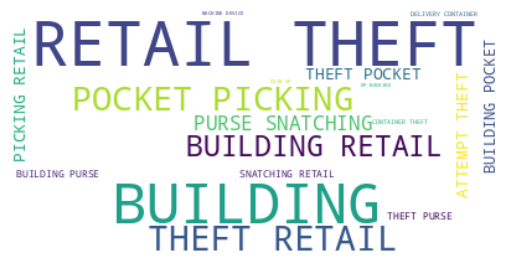

In [10]:
df_filter = df[df["Primary Type"]=='THEFT']
text = ' '.join(df_filter['Description'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [11]:
df["Primary Type"].value_counts().index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE',
       'OTHER OFFENSE', 'BURGLARY', 'ROBBERY', 'NARCOTICS',
       'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT',
       'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'PROSTITUTION', 'HOMICIDE', 'ARSON',
       'LIQUOR LAW VIOLATION', 'GAMBLING', 'KIDNAPPING', 'STALKING',
       'INTIMIDATION', 'OBSCENITY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)'],
      dtype='object', name='Primary Type')

In [12]:
df["Primary Type"].value_counts().index[1]

'BATTERY'

In [13]:

df["Primary Type"].value_counts().index[3]

'ASSAULT'

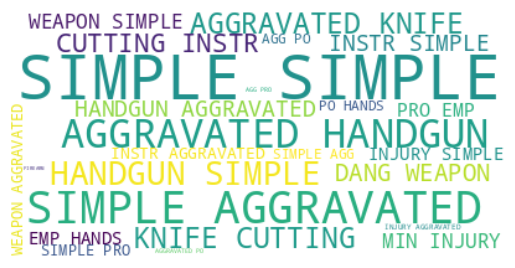

In [14]:
def wordcloud_crime(df,rank):
    df_filter = df[df["Primary Type"]==df["Primary Type"].value_counts().index[rank]]
    text = ' '.join(df_filter['Description'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    #print("Crime type: ", df["Primary Type"].value_counts().index[5])
wordcloud_crime( df, rank=3)

# Ejercicio 2:
Usar el codigo anterior para generar un wordcloud de battery cases y criminal cases. Cuales son las palabras mas comunes para describir estos dos tipos de casos

Crime type:  BATTERY


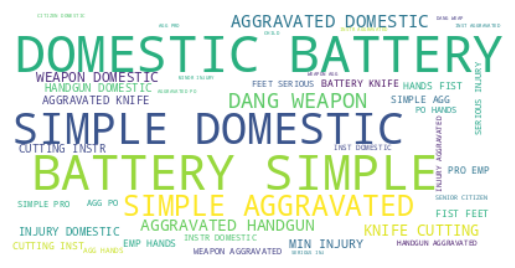

Crime type:  CRIMINAL DAMAGE


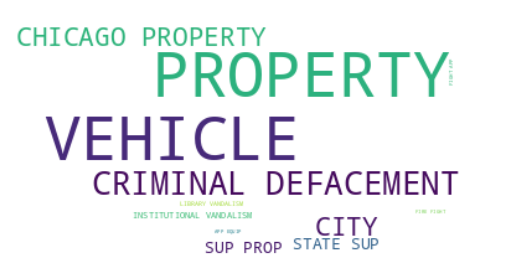

In [15]:
print("Crime type: ", df["Primary Type"].value_counts().index[1])
wordcloud_crime( df, rank=1 )
print("Crime type: ", df["Primary Type"].value_counts().index[2])
wordcloud_crime( df, rank=2 )

# Respuesta.
 La agresión está fuertemente ligada a la palabra "doméstico", lo que implica que las cargas de la batería suelen afectar a miembros de la familia. El daño criminal estuvo fuertemente asociado con las palabras "propiedad" y "vehículo", lo que indica los objetivos de la mayoría de los casos de daños criminales.

Ejercicio 3:
Como hemos visto con las nubes de palabras, parece que un tipo determinado de delito suele estar vinculado a determinados tipos de ubicaciones (por ejemplo, en casa, en tiendas minoristas). Escriba un código para investigar los patrones delictivos asociados con los tipos de ubicaciones delictivas. Según los resultados, ¿qué tipos de ubicaciones tienen más probabilidades de tener delitos?

Respuesta: Debido a que Location Description es una variable discreta,podemos usar el mismo codigo que usamos para Primary Type. Basados en los resultados, podemos encontrar la calle, residencia, apartamentos y calles con alrededor 50% de los incidentes.

# Ejercicio 3:
Como hemos visto con las nubes de palabras, parece que un tipo determinado de delito suele estar vinculado a determinados tipos de ubicaciones (por ejemplo, en casa, en tiendas minoristas). Escriba un código para investigar los patrones delictivos asociados con los tipos de ubicaciones delictivas. Según los resultados, ¿qué tipos de ubicaciones tienen más probabilidades de tener delitos?

Respuesta: Debido a que Location Description es una variable discreta,podemos usar el mismo codigo que usamos para Primary Type. Basados en los resultados, podemos encontrar la calle, residencia, apartamentos y calles con alrededor 50% de los incidentes.

<Axes: xlabel='Location Description'>

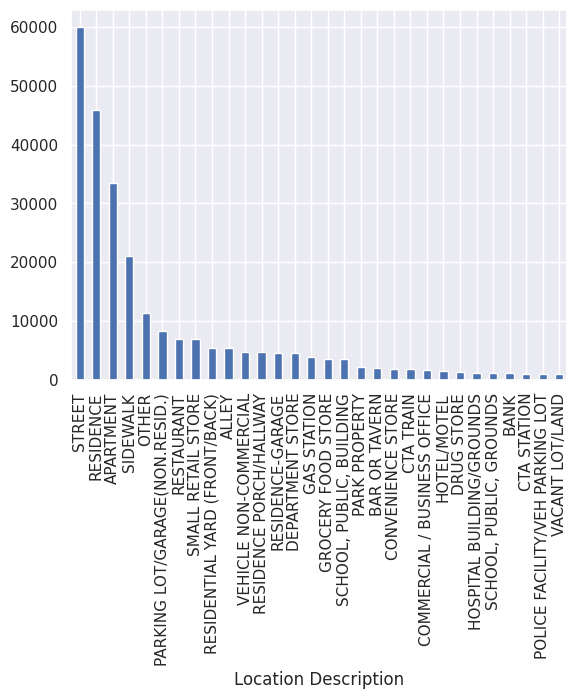

In [16]:
df["Location Description"].value_counts()[0:30].plot(kind='bar')

# Tablas de contingencia
Hasta el momento hemos visto los patrones de crimenes asociados con Primary Type y Location Description separadamente. Tiene sentido analizar cierto tipo de combinacion de tipo de crimen y tipo de ubicacion es prevalente o no. Sabemos que Primary Type y Location Description son variables discreatas. Luego entonces podemos usar una contingency table (cross table) para resumir el total de indidentes que pertenecen a cierta combinacion de valores de Primary Type y Location Description.

No podemos usar el codigo previo donde analizamos Primary Type y Description al mismo tiempo ya que a diferencia de esas dos variables, Location Description y Primary Type NO son nested variables. Podemos usar la funcion crosstab en pandas para generar la tabla de contingencia de estas dos variables

# Ejercicio 4:
4.1
crosstab(var1, var2) genera la tabla de contingencia para var1 vs. var2. Use esta funcion para generar una tabla de contingencia de Primary Type vs. Location Description donde solo se muestren el top 10 de las localizaciones prevalentes y tipos de crimenes.#

In [17]:
df["Location Description"].value_counts().index[:10]

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'RESTAURANT', 'SMALL RETAIL STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'ALLEY'],
      dtype='object', name='Location Description')

In [18]:
df["Primary Type"].value_counts().index[:10]

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE',
       'OTHER OFFENSE', 'BURGLARY', 'ROBBERY', 'NARCOTICS',
       'MOTOR VEHICLE THEFT'],
      dtype='object', name='Primary Type')

In [19]:
df_1 = df[df["Location Description"].isin(df["Location Description"].value_counts().index[:10]) & 
          df["Primary Type"].isin(df["Primary Type"].value_counts().index[:10])]
print(df_1.shape)
df_1.head()

(188259, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"
5,11192231,JB100018,12/31/17 23:43,039XX N LONG AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,38.0,15,18,1139656.0,1925536.0,2017,5/4/18 15:51,41.951779,-87.762026,"(41.951778739, -87.76202629)"
6,11192238,JA569474,12/31/17 23:40,048XX N AVERS AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,39.0,14,14,1149845.0,1931713.0,2017,5/4/18 15:51,41.968536,-87.724410,"(41.968536385, -87.724409882)"


In [20]:
t=pd.crosstab(index=df_1["Primary Type"],columns=df_1["Location Description"])
t

Location Description,ALLEY,APARTMENT,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,SIDEWALK,SMALL RETAIL STORE,STREET
Primary Type,,,,,,,,,,
ASSAULT,485,2839,753,499,3189,495,541,2189,363,3533
BATTERY,1038,11706,1021,849,10136,815,692,6812,321,6732
BURGLARY,18,3956,494,40,4170,29,312,6,319,49
CRIMINAL DAMAGE,434,3767,804,1442,5524,828,433,251,347,9997
DECEPTIVE PRACTICE,19,1762,2261,201,6225,20,925,226,601,965
MOTOR VEHICLE THEFT,196,70,277,861,307,299,15,29,9,8217
NARCOTICS,646,613,136,319,730,235,40,3264,28,3013
OTHER OFFENSE,158,2473,1355,158,6697,146,185,593,175,3451
ROBBERY,929,235,230,383,234,171,195,3513,366,3548


<Axes: xlabel='Location Description', ylabel='Primary Type'>

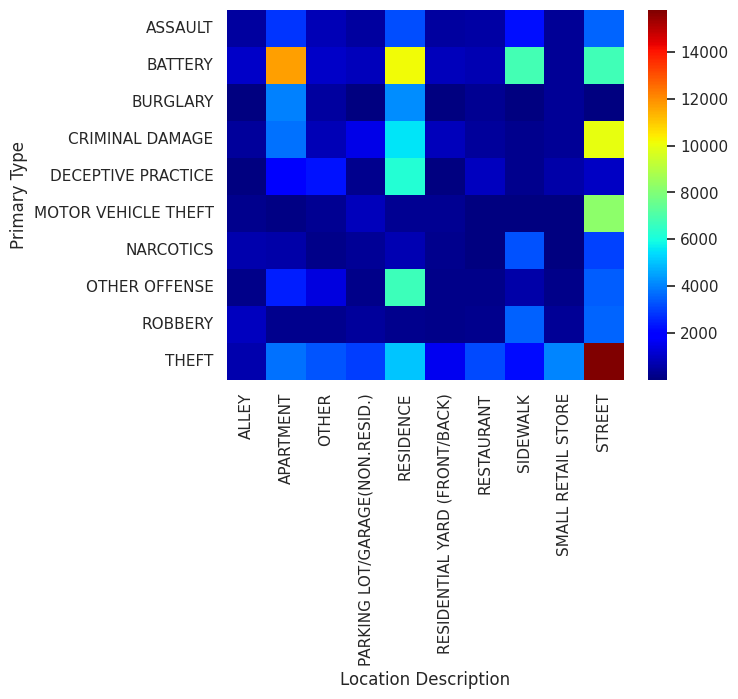

In [21]:

sns.heatmap(t,cmap='jet')

In [23]:
beat_orig = geopandas.read_file("Boundaries_beat.geojson", driver = "GeoJSON")
beat_orig


# visualizacion interactiva para cada beat y su tasa de crimen en 2017
### CREACION DEL FONDO DEL MAPA
m_crime = folium.Map(location=[41.88, -87.63],zoom_start=12,tiles="OpenStreetMap")
## CREACION DE FUNCION ESTILO
style_function = lambda x: {
    'fillColor': colormap(x['properties']['crime_count']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
}
# PROYECCION DE LOS POLIGONOS 
stategeo = folium.GeoJson(
    beat_data.to_json(),
    name='Chicago beats',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['beat_num', 'crime_count'],
        aliases=['Beat', 'Total crime'], 
        localize=True
    )
).add_to(m_crime)

colormap.add_to(m_crime)
m_crime

DriverError: Boundaries_beat.geojson: No such file or directory